<a href="https://colab.research.google.com/github/pavankalyano76/PavanKalyan_INFO5731_Spring2025/blob/main/NatukulaPavanKalyan_Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [121]:
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/Assignment3_Q4_sentiment (1).csv')

# Display structure
print(df.head())
print(df['sentiment'].value_counts())


   document_id                                          tweetText sentiment
0            1  image fx competitive fencing tournament ai aia...  negative
1            2  responsible orgs marketing practice true compe...  negative
2            3  connected intelligence boomi lock apis generat...   neutral
3            4  fascinated fusion art technology explore new g...  positive
4            5  microsoft tout muse new generative ai model vi...  negative
sentiment
neutral     34
negative    33
positive    33
Name: count, dtype: int64


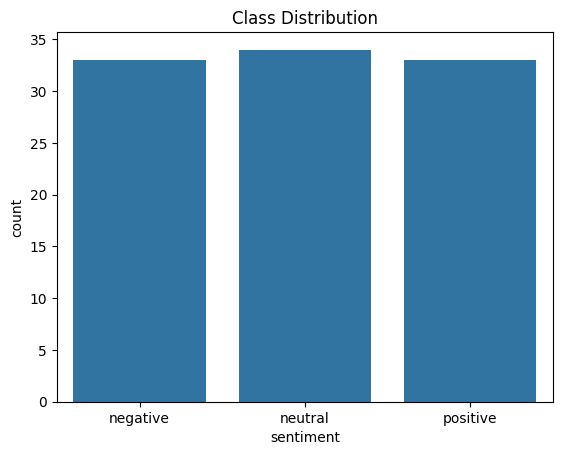

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='sentiment', data=df)
plt.title("Class Distribution")
plt.show()




In [123]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['tweetText_Cleaned'] = df['tweetText'].astype(str).apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


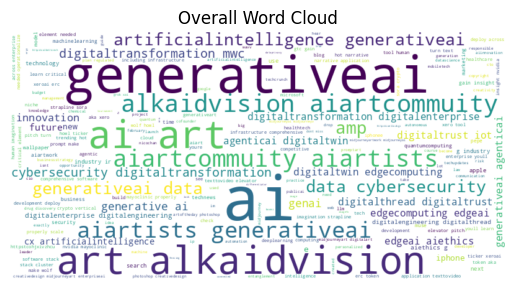

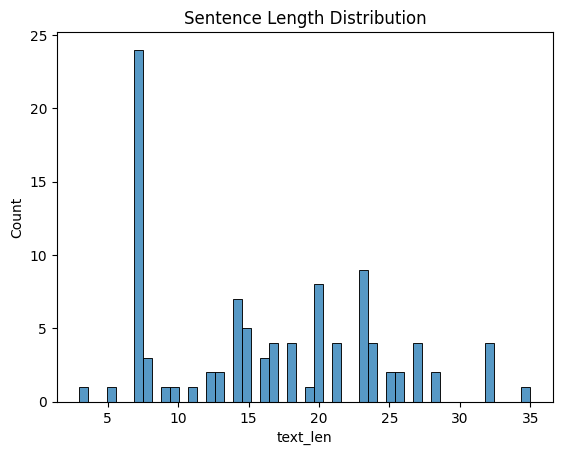

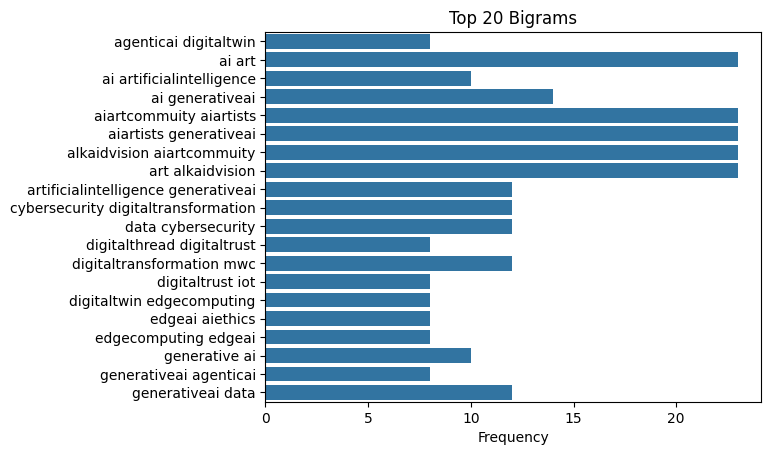

In [124]:
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Word cloud
text_all = ' '.join(df['tweetText_Cleaned'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Word Cloud")
plt.show()

# Sentence length
df['text_len'] = df['tweetText_Cleaned'].apply(lambda x: len(x.split()))
sns.histplot(df['text_len'], bins=50)
plt.title("Sentence Length Distribution")
plt.show()

# Top Bigrams
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_bigrams = vectorizer.fit_transform(df['tweetText_Cleaned'])
bigrams = vectorizer.get_feature_names_out()
bigram_counts = X_bigrams.sum(axis=0).A1

sns.barplot(x=bigram_counts, y=bigrams)
plt.title("Top 20 Bigrams")
plt.xlabel("Frequency")
plt.show()


In [131]:
label_map = {
    'negative': 0,
    'neutral': 2,
    'positive': 1
}

# Apply mapping
df['sentiment_numeric'] = df['sentiment'].map(label_map)


In [132]:
df.head()

,document_id,tweetText,sentiment,tweetText_Cleaned,text_len,sentiment_numeric
0,1,image fx competitive fencing tournament ai aia...,negative,image fx competitive fencing tournament ai aia...,10,0
1,2,responsible orgs marketing practice true compe...,negative,responsible orgs marketing practice true compe...,11,0
2,3,connected intelligence boomi lock apis generat...,neutral,connected intelligence boomi lock apis generat...,16,2
3,4,fascinated fusion art technology explore new g...,positive,fascinated fusion art technology explore new g...,24,1
4,5,microsoft tout muse new generative ai model vi...,negative,microsoft tout muse new generative ai model vi...,15,0



--- SVM ---
Cross-validation Accuracy (mean ± std): 0.2750 ± 0.1159
Test Set Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.33      0.17      0.22         6
           2       0.33      0.57      0.42         7

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.27        20
weighted avg       0.29      0.30      0.27        20



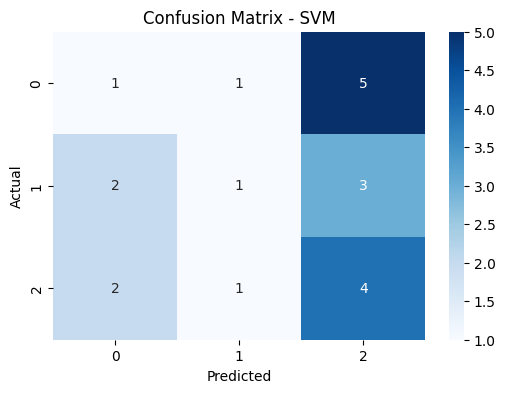


--- NaiveBayes ---
Cross-validation Accuracy (mean ± std): 0.2500 ± 0.0395
Test Set Accuracy: 0.2500
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.00      0.00      0.00         6
           2       0.27      0.57      0.36         7

    accuracy                           0.25        20
   macro avg       0.17      0.24      0.18        20
weighted avg       0.18      0.25      0.19        20



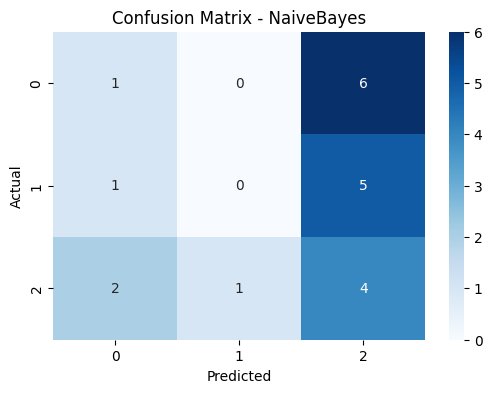


--- XGBoost ---
Cross-validation Accuracy (mean ± std): 0.2875 ± 0.1090
Test Set Accuracy: 0.4000
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.25      0.33      0.29         6
           2       0.57      0.57      0.57         7

    accuracy                           0.40        20
   macro avg       0.41      0.40      0.40        20
weighted avg       0.42      0.40      0.40        20



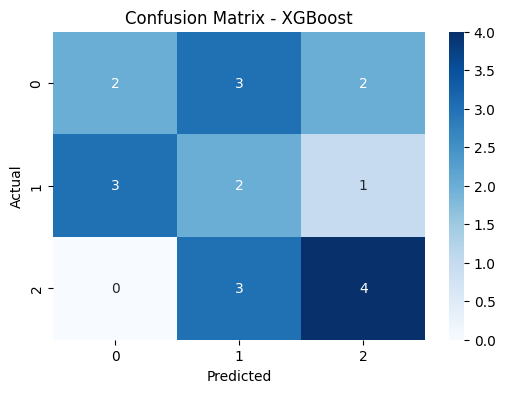

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data split
X = df['tweetText_Cleaned']
y = df['sentiment_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Models
models = {
    "SVM": LinearSVC(),
    "NaiveBayes": MultinomialNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation Accuracy (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Train on full training set
    model.fit(X_train_tfidf, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Store evaluation metrics
model_metrics = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)



    model_metrics.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Macro)': prec,
        'Recall (Macro)': rec,
        'F1 Score (Macro)': f1
    })

# Create DataFrame from metrics
metrics_df = pd.DataFrame(model_metrics)

# Sort by F1 Score (Macro) or Accuracy
metrics_df_sorted = metrics_df.sort_values(by='F1 Score (Macro)', ascending=False).reset_index(drop=True)

print("\n Model Comparison Summary:")
print(metrics_df_sorted)

# Best model
best_model_name = metrics_df_sorted.iloc[0]['Model']
print(f"\n Best Overall Model Based on F1 Score as f1 score manages the tradeoff between precision and recall: {best_model_name}")



 Model Comparison Summary:
        Model  Accuracy  Precision (Macro)  Recall (Macro)  F1 Score (Macro)
0     XGBoost      0.40           0.407143        0.396825          0.396825
1         SVM      0.30           0.288889        0.293651          0.269981
2  NaiveBayes      0.25           0.172222        0.238095          0.181818

 Best Overall Model Based on F1 Score as f1 score manages the tradeoff between precision and recall: XGBoost


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
def load_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            label = int(line[0])
            text = line[2:].strip()
            data.append((label, text))
    return pd.DataFrame(data, columns=['label', 'text'])

train_df = load_data("/content/stsa-test.txt")
test_df = load_data("/content/stsa-train.txt")


In [ ]:

print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

Missing values in training data:
label    0
text     0
dtype: int64

Missing values in test data:
label    0
text     0
dtype: int64


In [ ]:
print("Data types of columns in training data:")
print(train_df.dtypes)

Data types of columns in training data:
label     int64
text     object
dtype: object


In [ ]:
print("Basic summary statistics of training data:")
print(train_df.describe())

Basic summary statistics of training data:
             label
count  1821.000000
mean      0.499176
std       0.500137
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


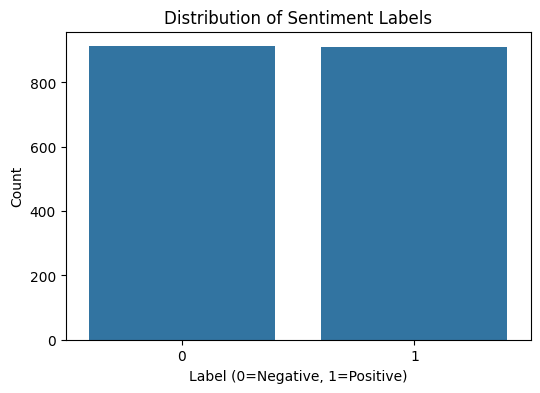

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel('Label (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

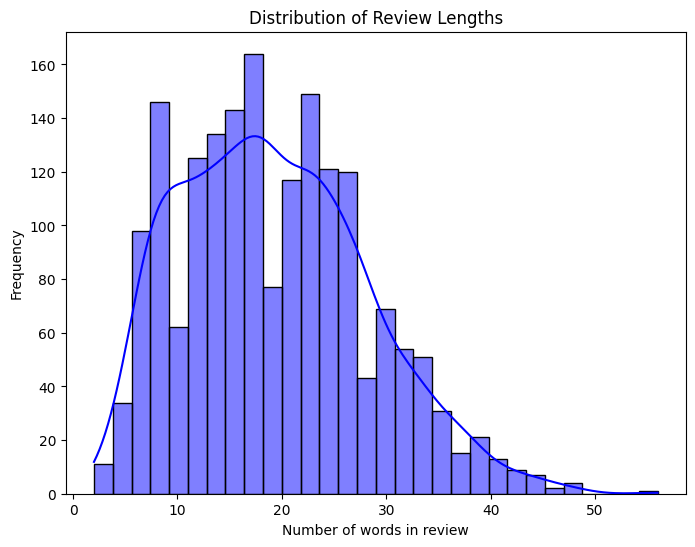

In [ ]:
# 5. Text length analysis (word count in reviews)
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(train_df['text_length'], kde=True, color='blue', bins=30)
plt.title("Distribution of Review Lengths")
plt.xlabel('Number of words in review')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only needed once)
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenizing and cleaning the text
all_reviews_cleaned = ' '.join(train_df['text'].values).lower()
words = re.findall(r'\w+', all_reviews_cleaned)

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Display the top 10 frequent words
print("\nTop 10 most frequent words in reviews (excluding stopwords):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")



Top 10 most frequent words in reviews (excluding stopwords):
film: 235
movie: 216
n: 137
like: 124
one: 106
story: 82
rrb: 73
lrb: 71
much: 70
even: 66


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train_full, X_val, y_train_full, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label'])

In [ ]:
X_test = test_df['text']
y_test = test_df['label']

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)

In [ ]:
# Classifiers to evaluate
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
# Perform 10-fold cross-validation and evaluate
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', vectorizer),
        ('clf', model)
    ])
    print(f"\nTraining and evaluating: {name}")
    scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=10, scoring='accuracy')
    print(f"Average CV Accuracy: {scores.mean():.4f}")

     # Train final model and evaluate on test set
    pipeline.fit(X_train_full, y_train_full)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }



Training and evaluating: SVM
Average CV Accuracy: 0.7171

Training and evaluating: KNN
Average CV Accuracy: 0.5014

Training and evaluating: DecisionTree
Average CV Accuracy: 0.6106

Training and evaluating: RandomForest
Average CV Accuracy: 0.6443

Training and evaluating: XGBoost
Average CV Accuracy: 0.6230


In [ ]:
print("\nFinal Test Set Evaluation:")
for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in scores.items():
        print(f"{metric.capitalize()}: {value:.4f}")


Final Test Set Evaluation:

Model: SVM
Accuracy: 0.7202
Precision: 0.7390
Recall: 0.7169
F1: 0.7278

Model: KNN
Accuracy: 0.4780
Precision: 0.4667
Recall: 0.0039
F1: 0.0077

Model: DecisionTree
Accuracy: 0.6017
Precision: 0.6343
Recall: 0.5587
F1: 0.5941

Model: RandomForest
Accuracy: 0.6499
Precision: 0.7122
Recall: 0.5518
F1: 0.6218

Model: XGBoost
Accuracy: 0.6319
Precision: 0.6726
Recall: 0.5737
F1: 0.6192


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [18]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


df = pd.read_csv("/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv")

# Basic EDA
print(df.info())
print(df.head())
print(df['Reviews'].isnull().sum())

# Drop rows with null reviews
df = df.dropna(subset=['Reviews'])

# Add a column for text length
df['review_length'] = df['Reviews'].apply(lambda x: len(str(x).split()))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating          

<ipython-input-20-f5181f0332d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


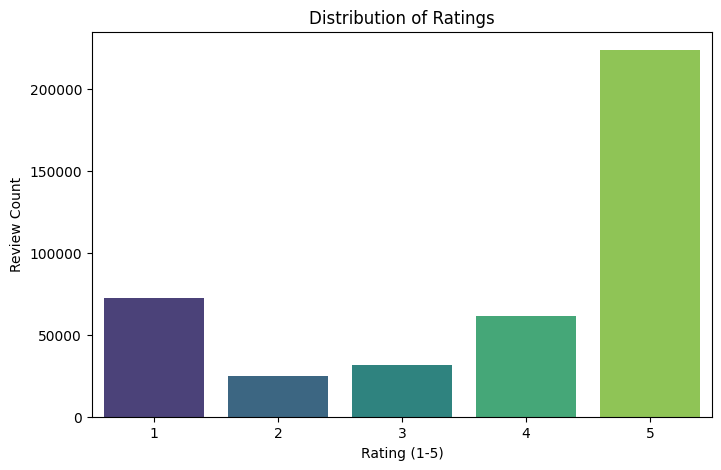

In [20]:
if 'Rating' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Rating', data=df, palette='viridis')
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating (1-5)")
    plt.ylabel("Review Count")
    plt.show()


<ipython-input-21-478d2a54d843>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='review_length', data=df, palette='coolwarm')


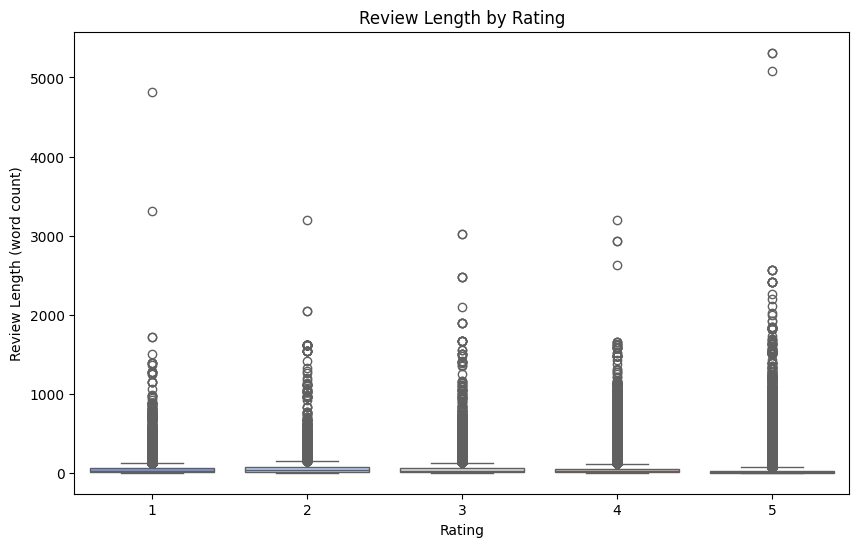

In [21]:
if 'Rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Rating', y='review_length', data=df, palette='coolwarm')
    plt.title("Review Length by Rating")
    plt.xlabel("Rating")
    plt.ylabel("Review Length (word count)")
    plt.show()


In [19]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    words = text.lower().split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_reviews'] = df['Reviews'].apply(preprocess)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned_reviews'])


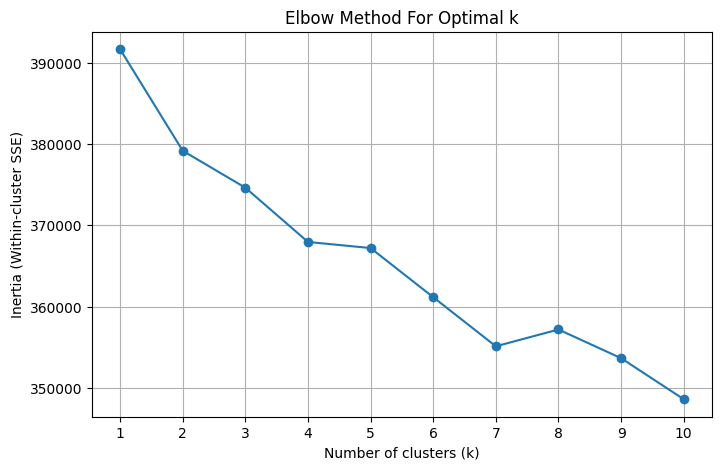

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run KMeans for a range of cluster numbers and calculate inertia
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
df['KMeans_Cluster'] = kmeans_labels


In [33]:
df['KMeans_Cluster'].unique()

array([2, 0, 1, 3], dtype=int32)

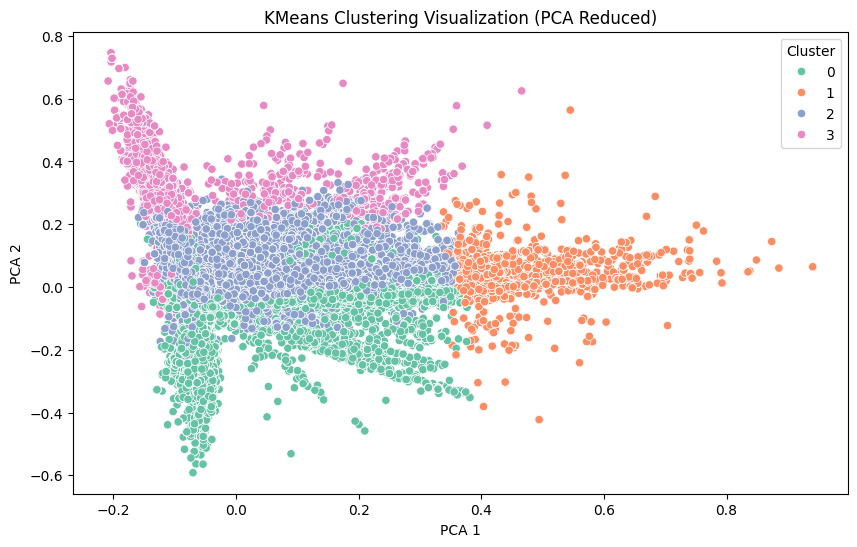

In [34]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


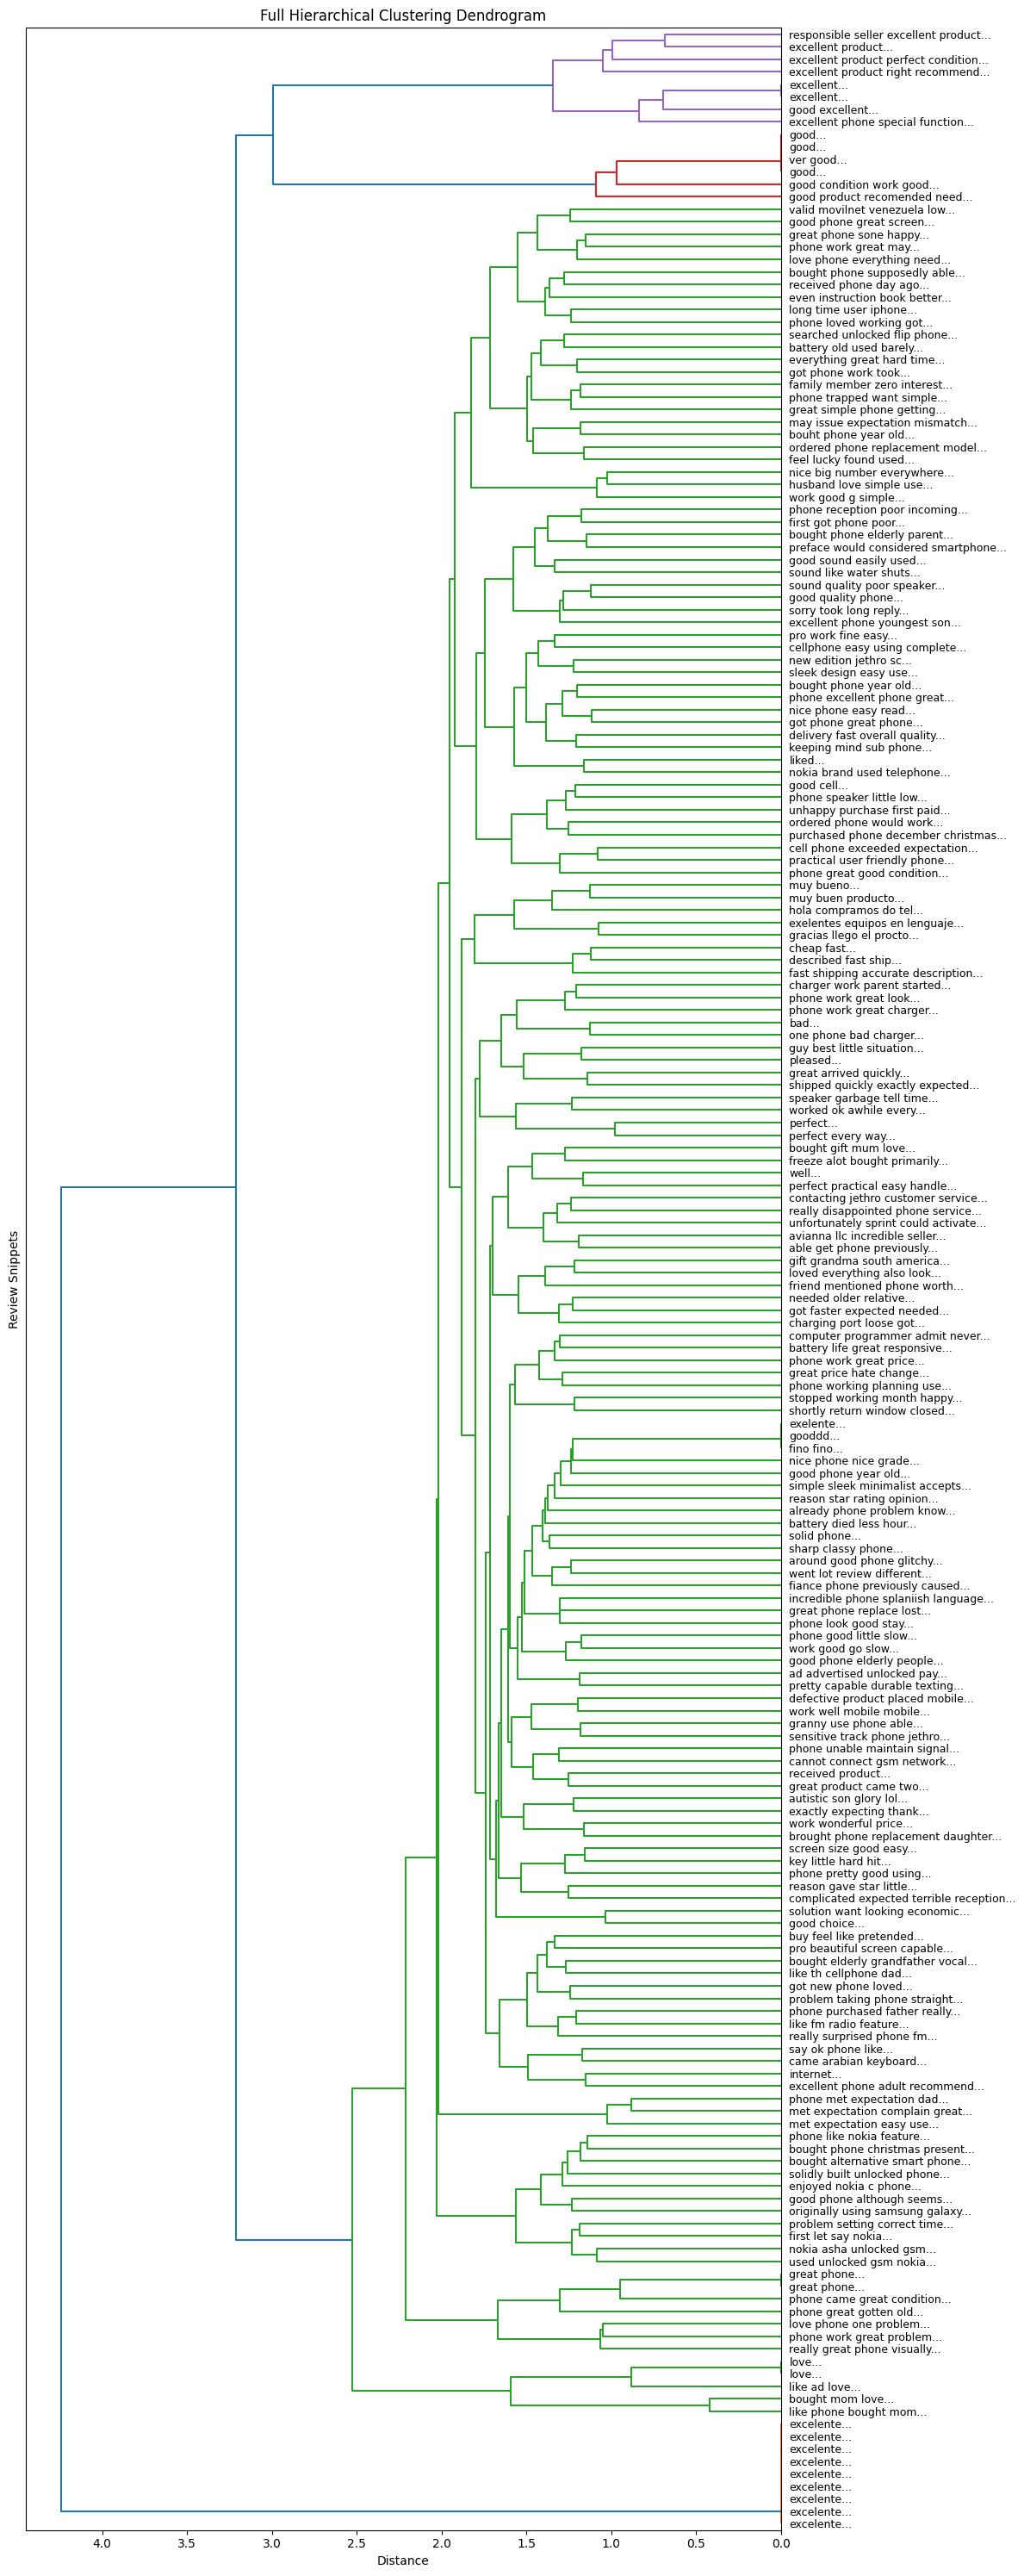

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use only a subset of reviews and their text (for visualization)
subset_size = 200  # You can adjust based on clarity
subset_texts = df['cleaned_reviews'].iloc[:subset_size]
subset_features = X_tfidf.toarray()[:subset_size]

# Create linkage matrix
linkage_matrix = linkage(subset_features, method='ward')

# Generate review labels (e.g., first 3-5 words of each review)
labels = [' '.join(review.split()[:4]) + '...' for review in subset_texts]

# Plot vertical dendrogram with labels
plt.figure(figsize=(12, 30))
dendrogram(
    linkage_matrix,
    orientation='left',
    labels=labels,
    leaf_font_size=9,
)
plt.title("Full Hierarchical Clustering Dendrogram")
plt.xlabel("Distance")
plt.ylabel("Review Snippets")
plt.tight_layout()
plt.show()



In [35]:
import nltk
nltk.download('punkt_tab')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np

tokenized_reviews = df['cleaned_reviews'].apply(word_tokenize)
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1)

# Average word vectors per review
def get_avg_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_w2v = np.vstack(df['cleaned_reviews'].apply(lambda x: get_avg_vector(word_tokenize(x))))
kmeans_w2v = KMeans(n_clusters=4, random_state=42).fit(X_w2v)
df['W2V_Cluster'] = kmeans_w2v.labels_


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


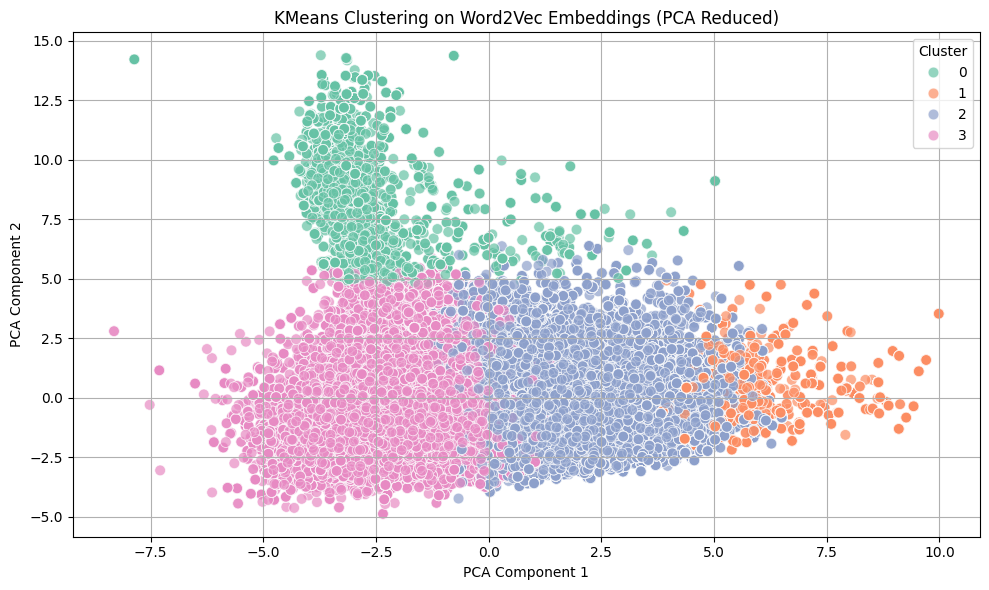

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce Word2Vec vectors to 2D using PCA
pca = PCA(n_components=2)
X_w2v_pca = pca.fit_transform(X_w2v)

# Add PCA components to DataFrame
df['W2V_PCA1'] = X_w2v_pca[:, 0]
df['W2V_PCA2'] = X_w2v_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='W2V_PCA1', y='W2V_PCA2',
    hue='W2V_Cluster', palette='Set2', s=60, alpha=0.7
)
plt.title("KMeans Clustering on Word2Vec Embeddings (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [89]:
sampled_df = df.sample(n=50000, random_state=42).copy()

X_sampled_tfidf = vectorizer.fit_transform(sampled_df['cleaned_reviews'])

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=20, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_sampled_tfidf)

sampled_df['DBSCAN_Cluster'] = dbscan_labels


In [90]:
sampled_df['DBSCAN_Cluster'].unique()

array([-1,  0,  1,  2,  5,  8,  6,  4,  7, 10,  3,  9])

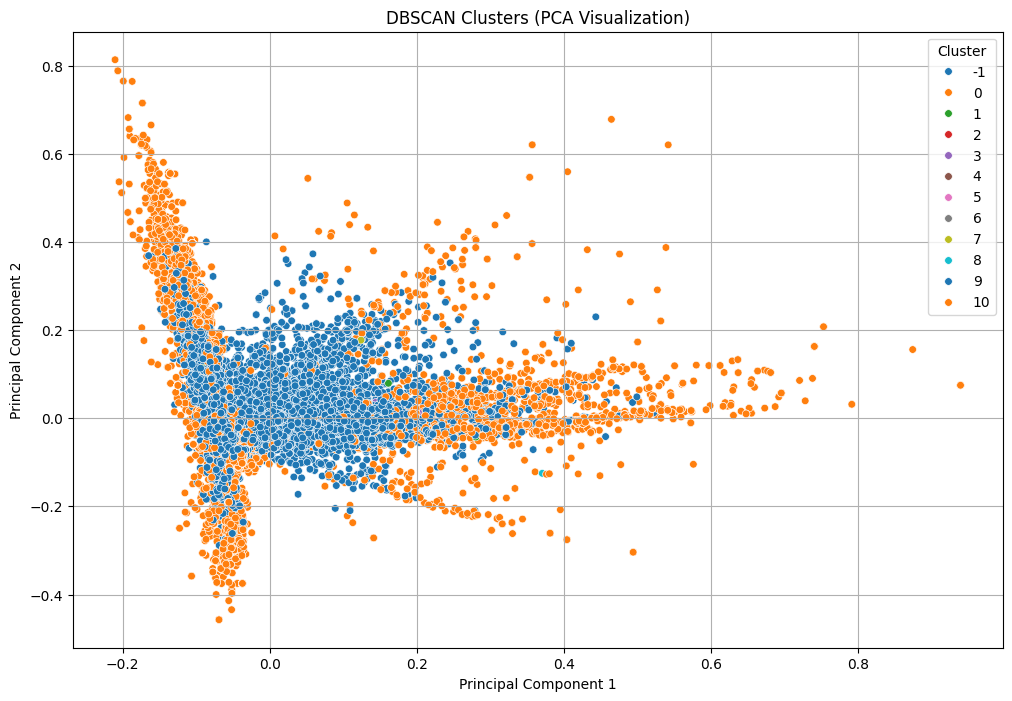

In [91]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sampled_tfidf.toarray())

# Add PCA components to the dataframe
sampled_df['PCA_1'] = X_pca[:, 0]
sampled_df['PCA_2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA_1', y='PCA_2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    data=sampled_df,
    legend='full',
    s=30
)
plt.title('DBSCAN Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

When applied to the TF-IDF features, K-means clustering was able to produce well-separated clusters (k=4) with elbow method to choose an optimal number of clusters to provide interpretable and visually distinct groupings. However, DBSCAN was too sensitive to its parameters (eps=0.4, min_samples=20), and its inability to work with high-dimensional TF-IDF vectors directly produced many noney points (-1 labels) pointing to its inadequacy for sparse text data. It worked reasonably well for a subset of the data, provided a hierarchical clustering, with a visual, interpretable dendrogram, and required more time to compute than operating at the table level directly. When clustered using K-mean cluster, the Word2Vec embeddings in fact were capable of capturing semantic relationships better than TF-IDF, and produced clusters that were smoother and tighter, and with better alignment of clusters with the sense of our sentences. Overall, the Word2Vec based clustering represented review semantics better, but the traditional and most stable and scalable method was K-means with TF-IDF.

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

